# 타이타닉 데이터 분석

[사용 데이터]
- 타이타닉 데이터 : 데이터 분석을 하는 것에 있어서 가장 기본적인 데이터셋

[분석 목적]
- 1. 시각화 : 타이타닉 사고가 발생했을 때에, 어떤 조건일 때에 생존률이 높았고, 낮았는지, 여러개의 칼럼별 특징으로 나누고, 탐색적 데이터 분석 및 시각화로 이를 확인할 수 있게 시각화하는 것이 목적
- 2. 머신러닝 : 주어진 데이터를 토대로, 머신러닝 모델을 가동해봄으로써, 해당 사람이 이 사고로 인해 살았는지, 사망했는지 예측하는 모델 작성

[진행 과정]
1. 데이터셋 확인 - 대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 null data가 존재합니다. 이를 확인하고, 향후 수정합니다.
2. 탐색적 데이터 분석(exploratory data analysis) - 여러 feature 들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인합니다. 여러 시각화 툴을 사용하여 insight를 얻습니다.
3. feature engineering - 모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering 합니다. one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등을 합니다.
4. model 만들기 - sklearn 을 사용해 모델을 만듭니다. 파이썬에서 머신러닝을 할 때는 sklearn 을 사용하면 수많은 알고리즘을 일관된 문법으로 사용할 수 있습니다. 물론 딥러닝을 위해 tensorflow, pytorch 등을 사용할 수 도 있습니다. (다만, 딥러닝은 상당한 코딩 수준과 수학적 지식을 요구하기에, 패스하겠습니다.)
5. 모델 학습 및 예측 - trainset 을 가지고 모델을 학습시킨 후, testset 을 가지고 prediction 합니다.
6. 모델 평가 - 예측 성능이 원하는 수준인지 판단합니다. 풀려는 문제에 따라 모델을 평가하는 방식도 달라집니다. 학습된 모델이 어떤 것을 학습하였는 지 확인해봅니다.

In [70]:
# 데이터 처리 필수 라이브러리
import numpy as np
import pandas as pd
# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프의 기본 schema를 seaborn으로 설정, 일일 그래프의 font-size를 규정해줌 -> 이 코드는 실행해도 되고, 실행하지 않아도 됩니다.
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

# 경고제어 -> 경고무시
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

- pandas : 파이썬에서 데이터프레임을 다루는데에 최적화된 라이브러리, 가장 많이 사용 -> 이를 통해서 통계적 분석, 전처리를 진행할 예정

- %matplotlib inline : notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것

- 경고제어 : https://tmdhhey.tistory.com/10

In [71]:
# 데이터셋 불러오기
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

- csv파일 불러오기 : pd.read_csv
- excel파일 불러오기 : pd.read_excel
- 추가로 txt 파일 불러오기 : https://jimmy-ai.tistory.com/232

    - 대표적인 해독 방법 (encoding='')
        - 기본적으로 utf-8로 해독, cp949, euc-kr 등 존재

In [72]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


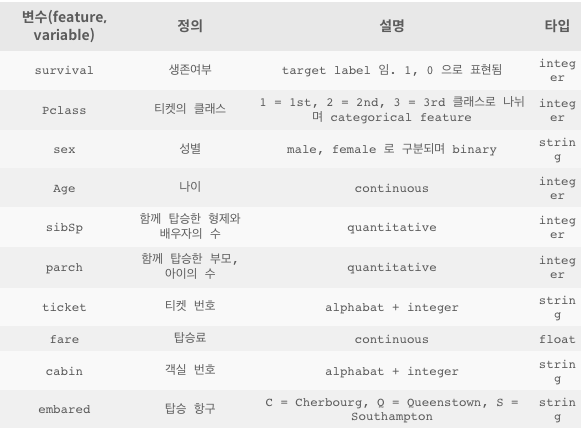

- 다룰 칼럼은 Pclass, Age, SibSp, Parch, Fare
- 예측할 target 칼럼은 Survived

In [73]:
# describe를 통해서 각 feature(변수)가 가진 통계치 반환
# 단, 수치화된 결과만 나옴 (문자로 이루어진 변수는 잘 나오지 않음)
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [74]:
# test 데이터 수치화 요약
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 1-1. Null Data 확인
- 데이터 분석을 수행하는 것에 있어서 null 데이터 (빈값)은 방해요소입니다. 이 값을 확인 후, 대체를 해주거나, 빈칸이 너무 많은 열이면 제거를 해줘야 합니다.

In [75]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


- 고급 포맷팅
    - {:>10} : 고급 포맷팅의 일종, >10은 오른쪽으로 10칸이 채워지게끔 조치, 빈 칸은 띄어쓰기로 처리함.
    - {:.2f} : 숫자를 소수점 2자리까지 나오게 표현 (3번째 자리에서 반올림)
    
- 참조 사이트 : https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=javaking75&logNo=221088111598

In [76]:
# PassengerId 칼럼의 빈칸 개수
df_train['PassengerId'].isnull().sum()

0

In [77]:
# PassengerId 칼럼의 데이터 개수
df_train['PassengerId'].shape[0]

891

In [78]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


[null data확인에서 드러난 결과]
- Age, Cabin 칼럼이 공통적으로 약 20%, 약 80%의 null값을 가지고 있는 것을 확인할 수 있음.
- 이를 시각적으로 표현하기위해 missingno(msno) 사용
    - msno : https://hong-yp-ml-records.tistory.com/14
    
- missingno : null값의 분포를 확인하기 위한 그래프, 주로 어디부분에 null값이 존재하는지 바코드모양 형식으로 확인할 수 있음

<AxesSubplot: >

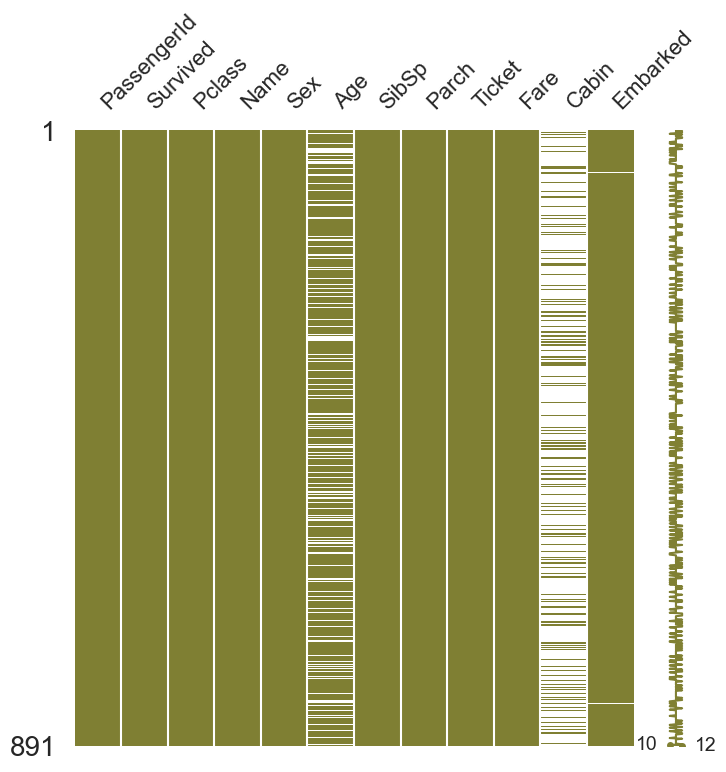

In [79]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.5, 0.5, 0.2)) # 색은 마음대로 바꿀 수 있습니다

<AxesSubplot: >

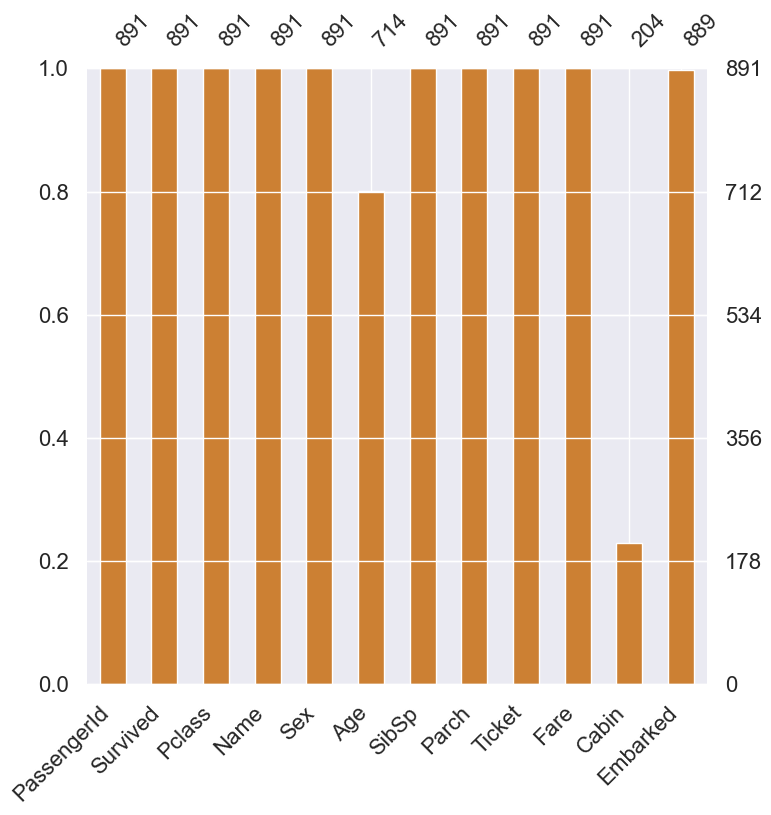

In [80]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

## 1-2. Target label 확인 
- target레이블을 확인함으로써, 어떻게 구성이 되어있는지 확인해보기
- 여기서는 1이냐 0이냐 하는 이진 분류이지만, 다중 결과가 드러날수도 있고, 분포가 불균형할 수도 있음. 이를 조치하기 위한 선제적 확인

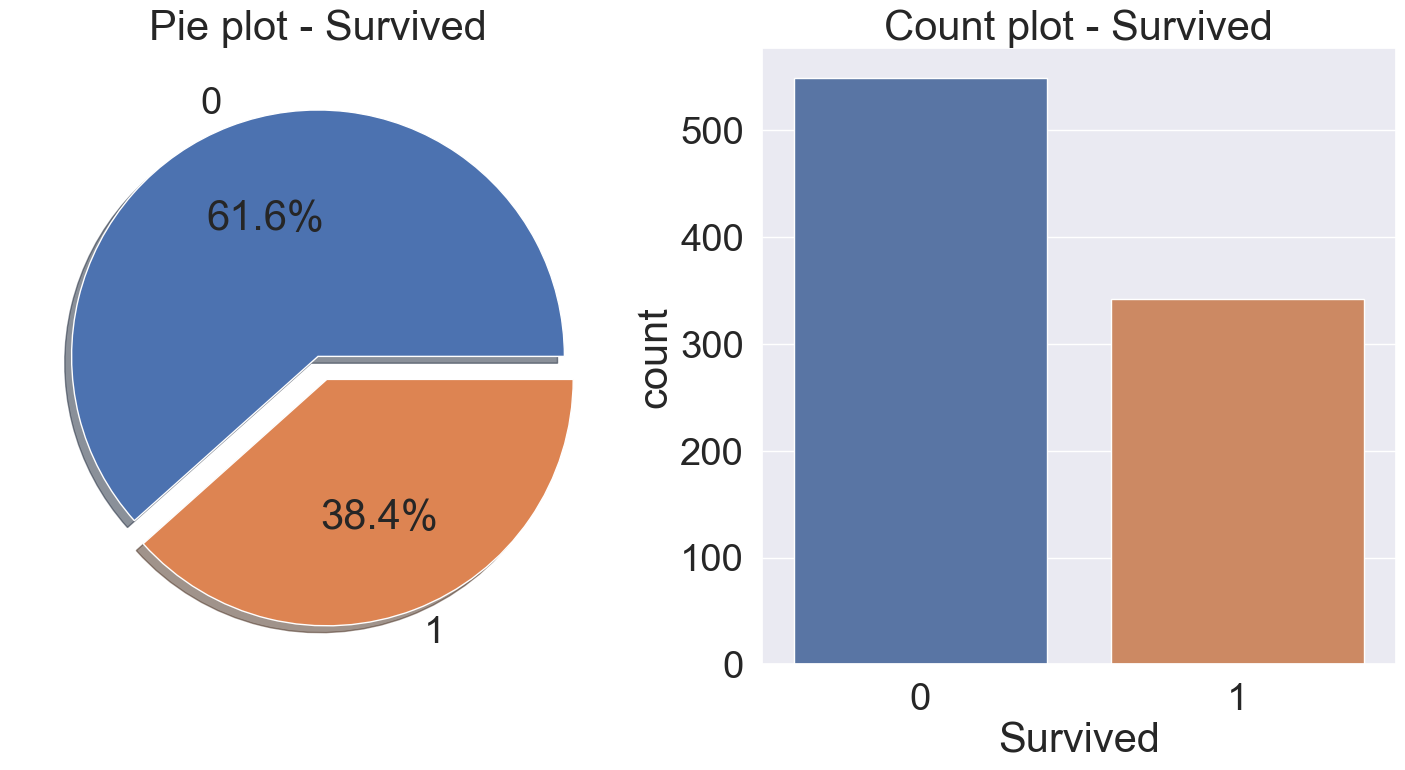

In [81]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- 생존자 비율을 확인해보니 생존의 비율보다 사망자의 비율이 훨씬 더 많은 것을 확인
- 원래는 샘플을 비슷하게 맞춰주는 오버샘플링 과정을 거쳐야 하지만, 여기서는 넘어갈 예정

# 2. 탐색적 데이터 분석 (EDA)
- 각 칼럼별 탐색적 데이터 분석 시행
## 2-1. Pclass

- Pclass : 숫자형 변수이자 범주형 변수
- 여기서는 Pclass별 생존률을 확인할 예정 -> 이는 groupby를 통해서 쉽게 확인 가능
    - 추가로 pivot이라는 메소드도 존재함.

In [82]:
# Pclass별 생존자 확인 (groupby 이용)
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [83]:
# survived가 0과 1로 나뉘기 때문에, 위의 count()로 그룹화한 방식과는 차이가 남.
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


- 여기서 count, sum의 차이를 보면 사망자의 수를 확인할 수 있음

In [84]:
# 위 과정을 crosstab을 이용하면 수월하게 진행할 수 있음
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot: xlabel='Pclass'>

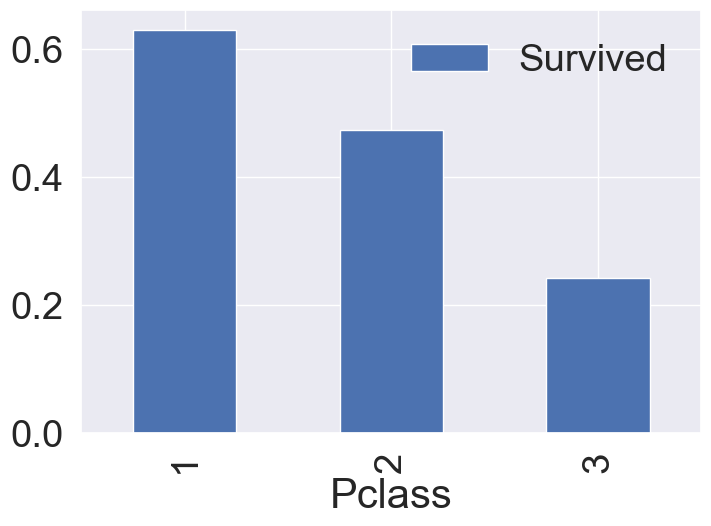

In [85]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

- 결과를 보면, Pclass가 좋을 수록, 생존률이 높은 것을 확인할 수 있음.
- 조금 더 자세하게 표현

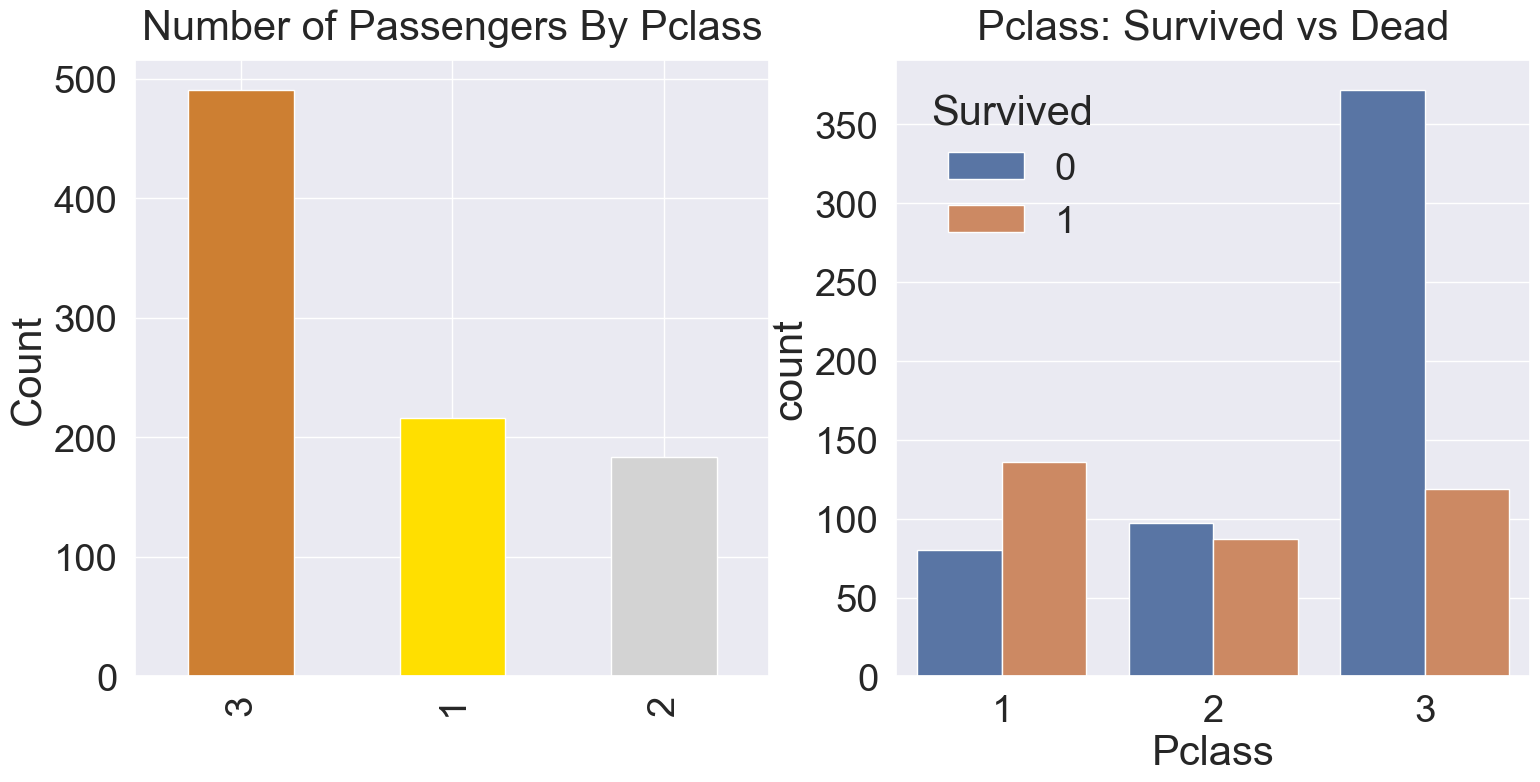

In [86]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

- 클래스가 높을수록, 생존률도 더 높았던 것으로 확인할 수 있습니다. 그래서 Pclass가 생존에 큰 영향을 미친다고 판단할 수 있고, 모델에 있어서 중요한 요소라고 가정할 수 있습니다.

[시각화 문법]
- f, ax를 통해서 subplot을 만들 수 있는데, 이 subplot은 하나씩 꾸밀 수 있음.
- 만약에 2개를 한다고 치면 첫번째는 ax[0], 두번째는 ax[1]

## 2-2 Sex

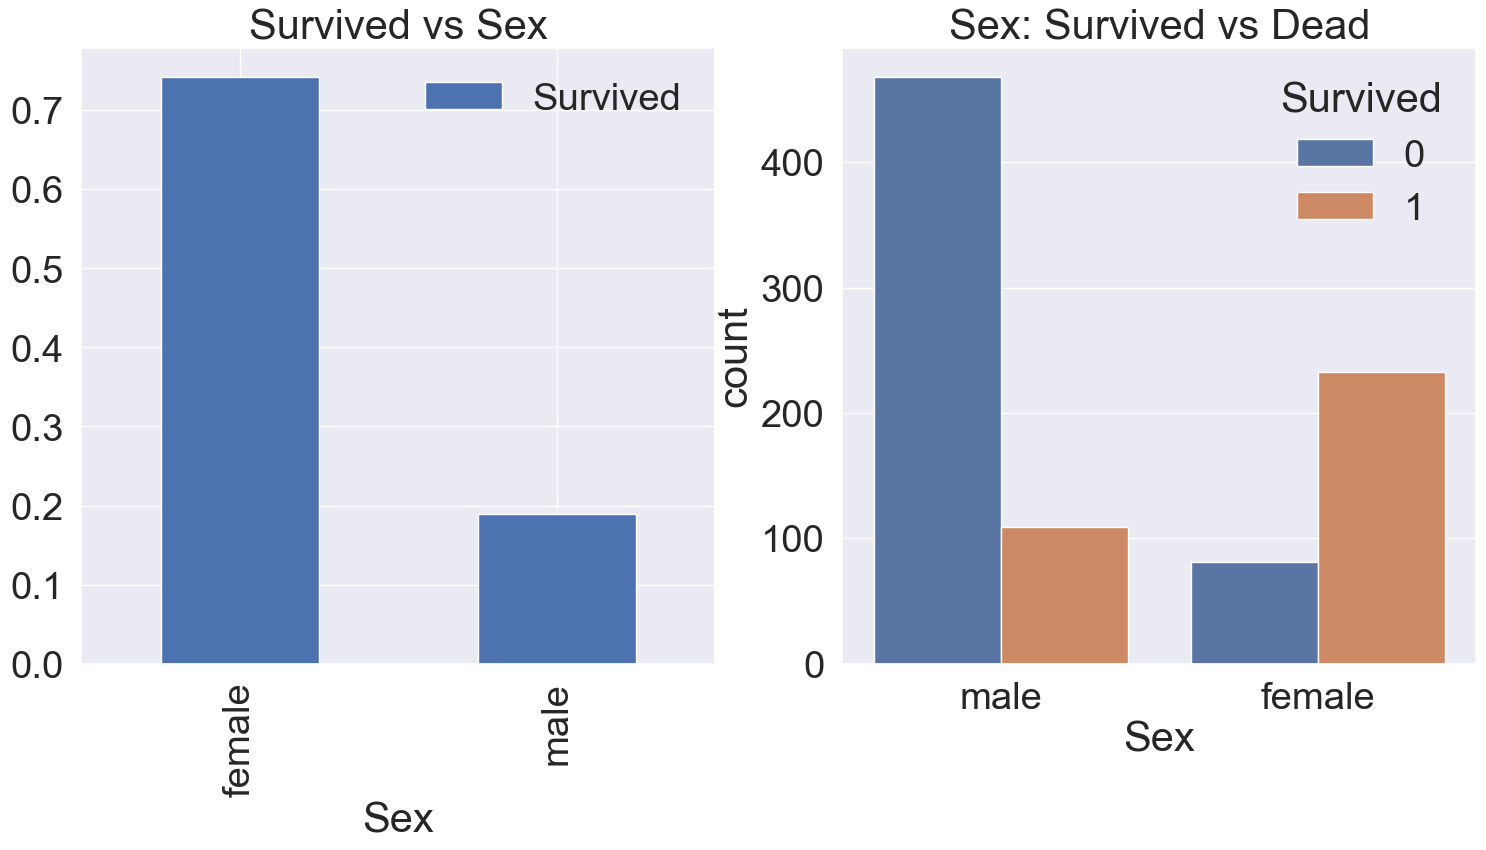

In [87]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()


- 성별을 보면, 남성보다는 여성이 다소 생존 확률이 많이 높았던 것으로 확인할 수 있습니다.

## 2.3 Both Sex and Pclass

- 이번에는 위의 2가지에 관해 생존률이 어떻게 달라지는지 비교해볼 예정입니다.

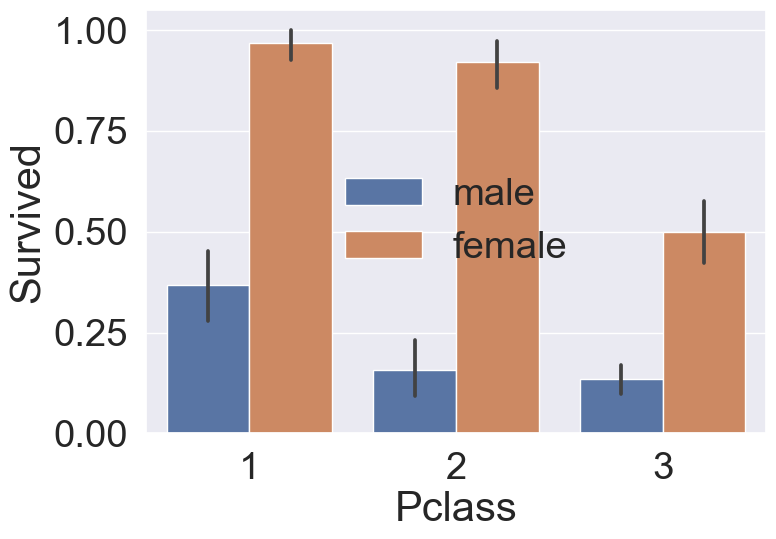

In [88]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df_train)
plt.legend(loc='best')
# 제 컴퓨터에서는 factorplot이 되지 않아서 대체했습니다.
# sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

- 모든 클래스에서 female이 살 확률이 높은 것을 확인할 수 있음.
- 남성의 경우는 제일 높은 등급에서도 생존률이 40%도 되지 않는 경우를 확인할 수 있음.

- 위의 그래프에서
    - x, y, hue가 있는데, 이 세개에 대응하는 칼럼은 서로 달라야 합니다.
    - hue : 분류 기준점 (hue에 따라 색깔을 다르게 함)

In [89]:
# sns.factorplot(x='Sex', y='Survived', col='Pclass',
#               data=df_train, satureation=.5,
#                size=9, aspect=1
#               )

## 2-4. Age

In [90]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


- 최댓값 : max
- 최소값 : min
- 평균값 : mean
- 최빈값 (가장 많이 나오는 값) : mode

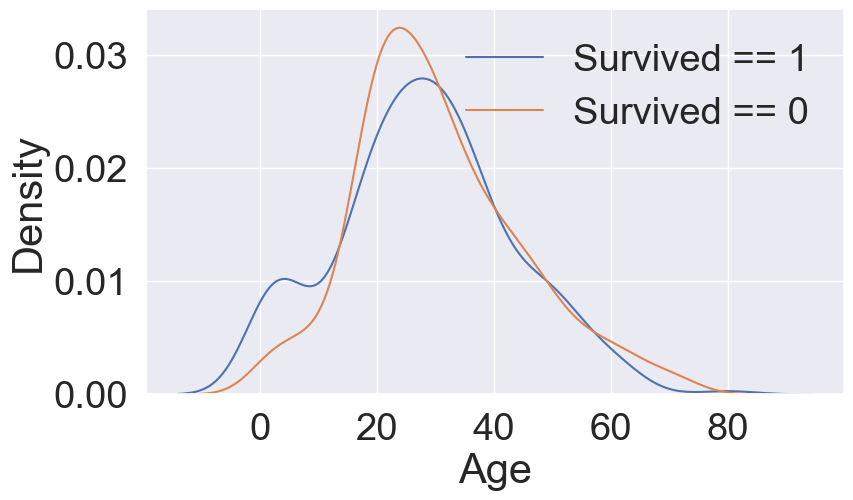

In [91]:
# 생존에 따른 연령별 히스토그램
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0']) # 축제목
plt.show()

- 확인 결과 생존자 중 나이가 어린 경우가 많은 것을 확인할 수 있음.

- kdeplot (커널 밀도 추정 그래프)
    - 히스토그램분포를 곡선화시켜서 나타내는 그래프
    - 참조 사이트 : https://hleecaster.com/python-seaborn-kdeplot/

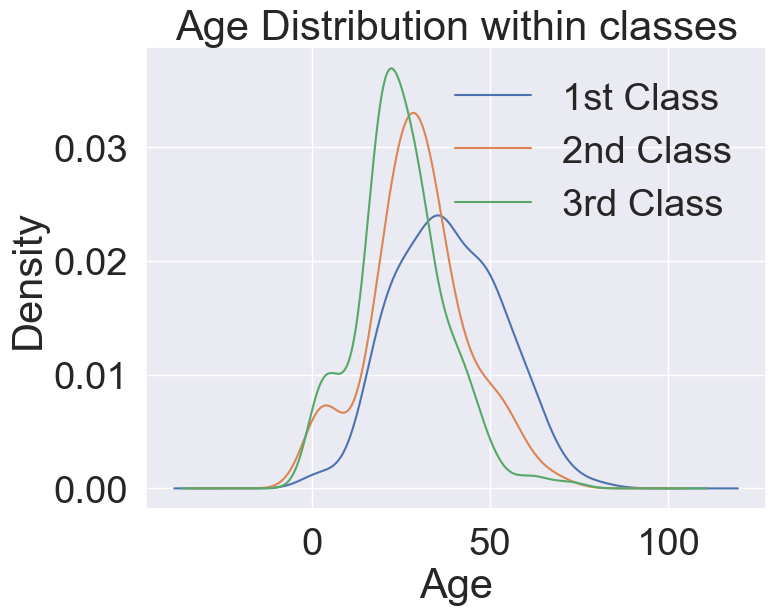

In [92]:
# Age distribution withing classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

- class가 높을수록 고령자의 비중이 높음

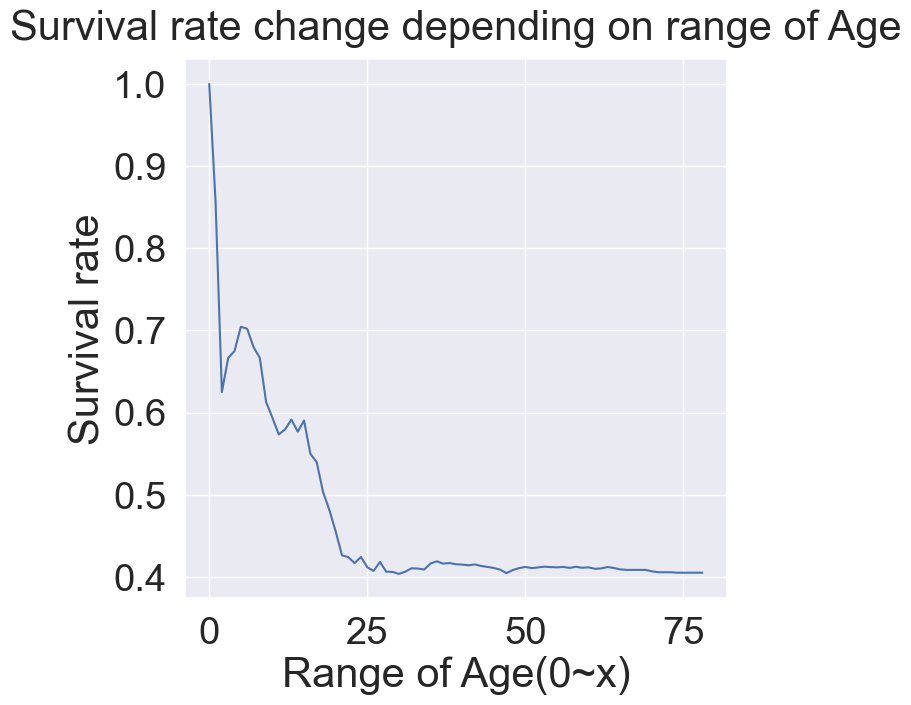

In [93]:
# 나이대에 따른 생존 분포 확인
cummulate_survival_ratio = []
# for문을 이용하여 연령별 생존률 cummulate_survival_ratio 리스트에 추가하기
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7)) # 그래프 크기
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 나이가 어릴수록 생존률이 확실히 높은 것을 확인할 수 있음
- 그래서 나이 칼럼도 중요한 feature로 사용될 수 있음

## 2.5 Pclass, Sex, Age
- 지금까지 본, Sex, Pclass, Age, Survived 모두에 대해서 보고싶습니다. 이를 쉽게 그려주는 것이 seaborn 의 violinplot입니다. (박스플롯과 유사하지만, 모양만 다릅니다)
- x 축은 우리가 나눠서 보고싶어하는 case(여기선 Pclass, Sex) 를 나타내고, y 축은 보고 싶어하는 distribution(Age) 입니다.

- hue는 알죠??

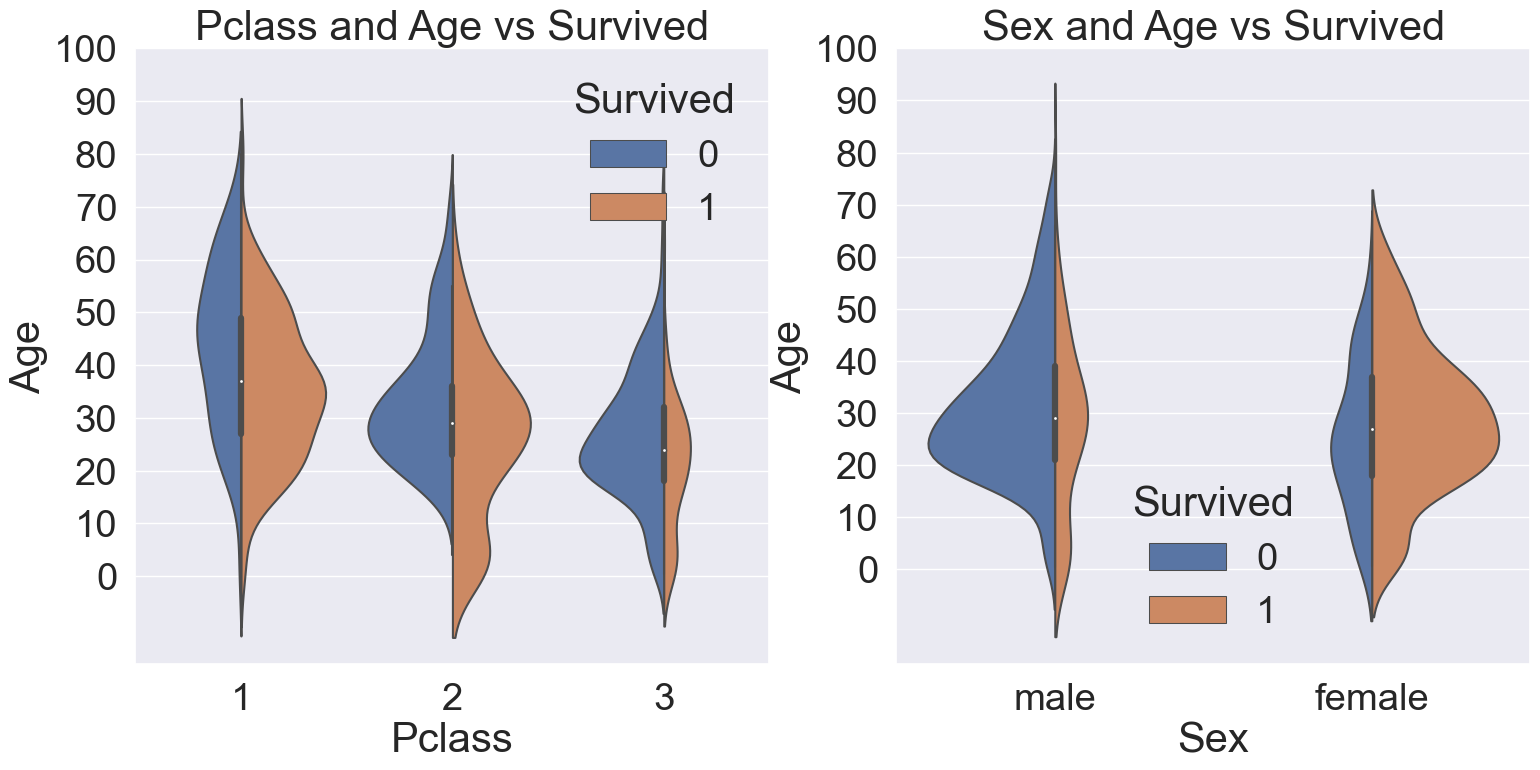

In [94]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

- 왼쪽 그림 : Pclass별로 Age의 distribution이 어떻게 다른지, 생존여부에 따라 분류
- 오른쪽 그림 : Sex, 생존에 따른 distribution이 어떻게 다른지 보여주는 그래프

- 생존만 봤을 때에는 나이가 어릴수록 생존을 더 많이 한 것을 확인할 수 있음.
- 오른쪽 그림을 보면, 명확히 여자가 더 많이 생존

-> 여성과 아이를 먼저 탈출시키지 않았나라고 추측해볼 수 있을 것 같습니다.

## 2.6 : Embarked
- 탑승 항구에 따른 생존 구분

<AxesSubplot: xlabel='Embarked'>

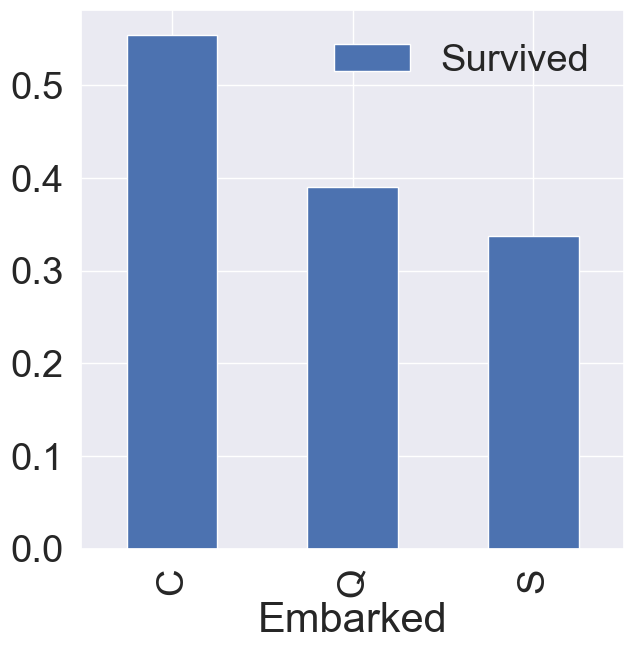

In [95]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

- 생존률에 있어서 크게 차이는 없지만, C가 제일 높은 것을 확인할 수 있음. (단, C와 S는 차이가 크게 나는 듯....)
- 모델의 차이는 많지 않겠지만, 사용해봄.
- 다른특징과 연결지어 확인

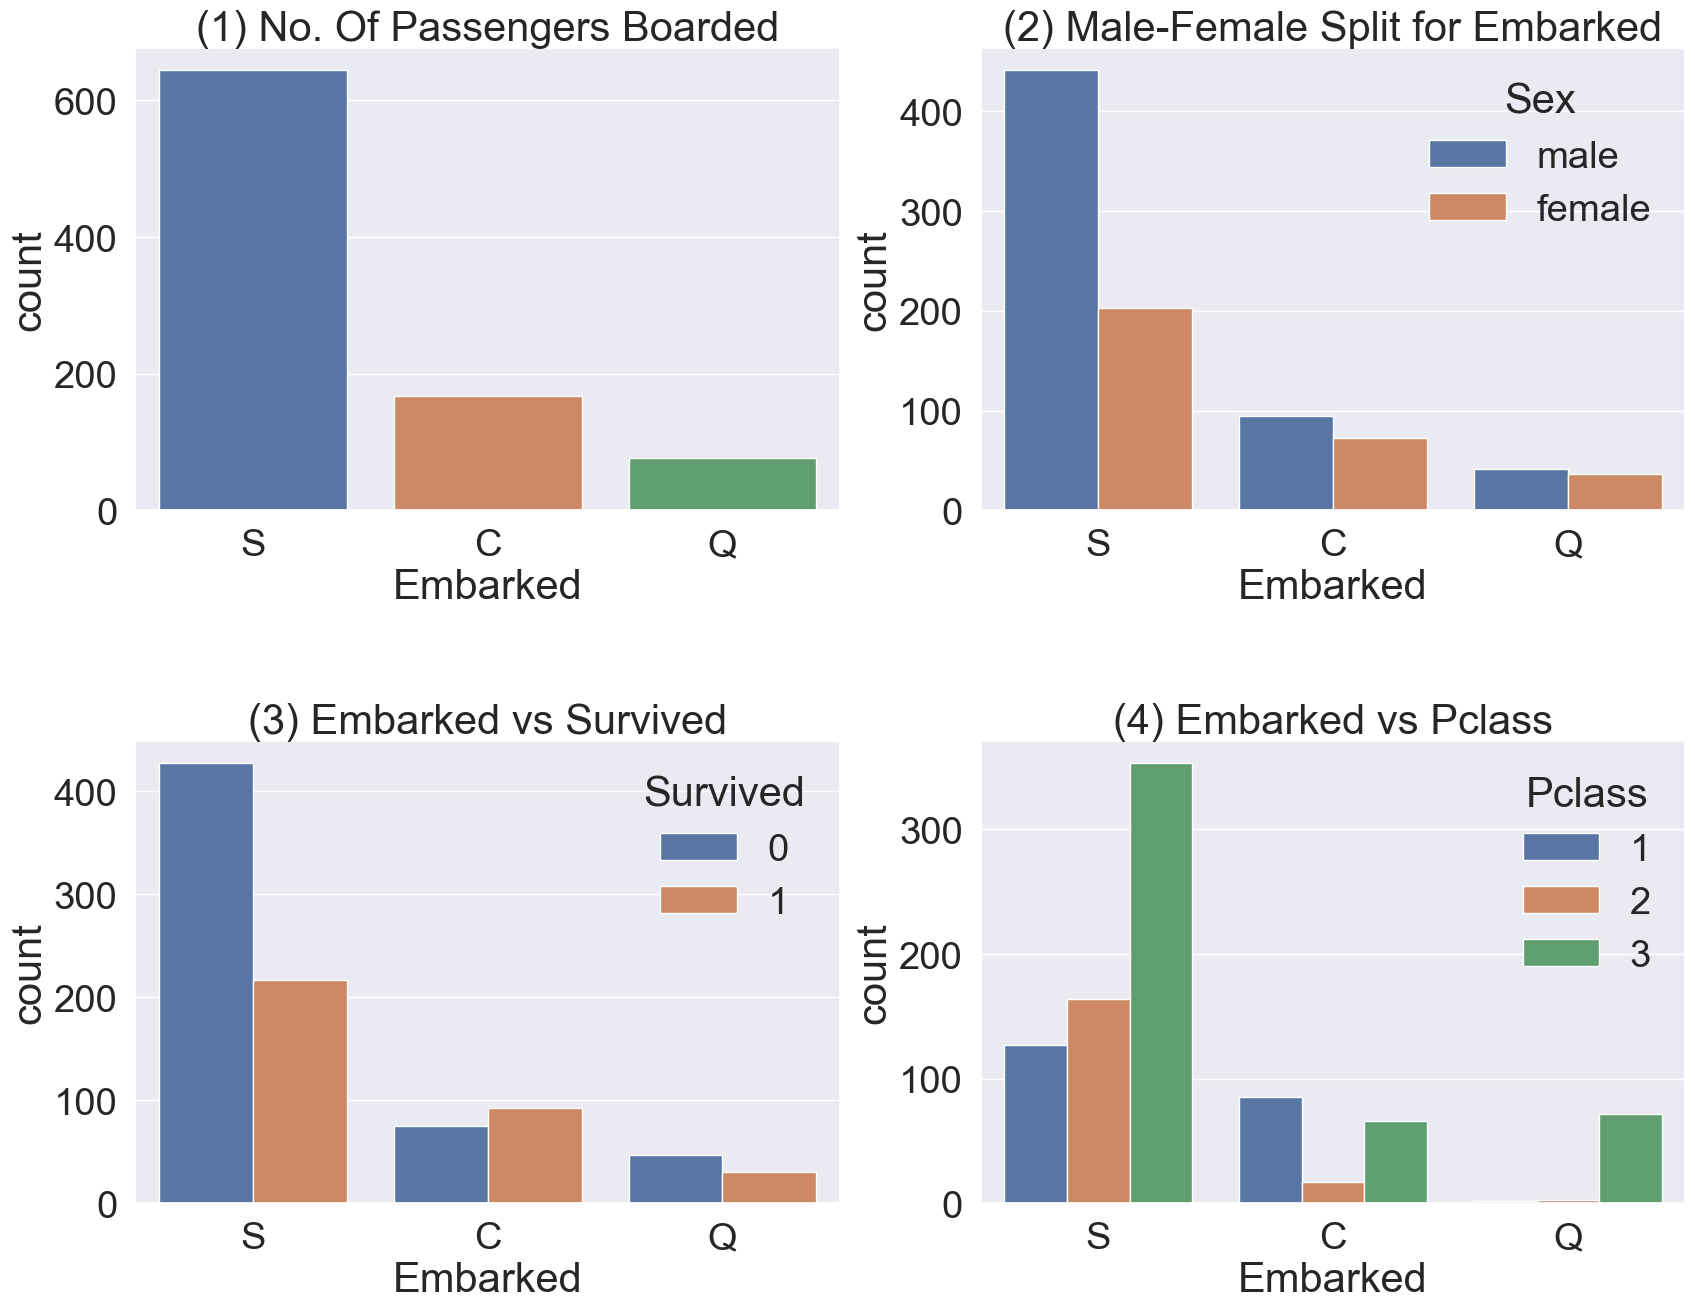

In [96]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot(x='Embarked', data=df_train, ax=ax[0,0]) # 해당 항구에서 탑승한 사람 수
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0,1]) # 성별별 해당 항구에 탑승한 사람 수
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1,0]) # 항구별 생존, 사망자 수
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1,1]) # 탑승 항구별 계층별 사람수
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure(1) - 전체적으로 봤을 때, S 에서 가장 많은 사람이 탑승했습니다.
- Figure(2) - C와 Q 는 남녀의 비율이 비슷하고, S는 남자가 더 많습니다.
- Figure(3) - 생존확률이 S가 아닐 경우 많이 낮은 걸 볼 수 있습니다. (이전 그래프에서 봤었습니다)
- Figure(4) - Class 로 split 해서 보니, S가 사람이 가장 많고, C Q순인 것으로 확인되었습니다.

+ countplot는 y를 필요로 하지 않습니다

## 2.7 Family - SibSp(형제 자매) + Parch(부모, 자녀)

In [97]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

In [98]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


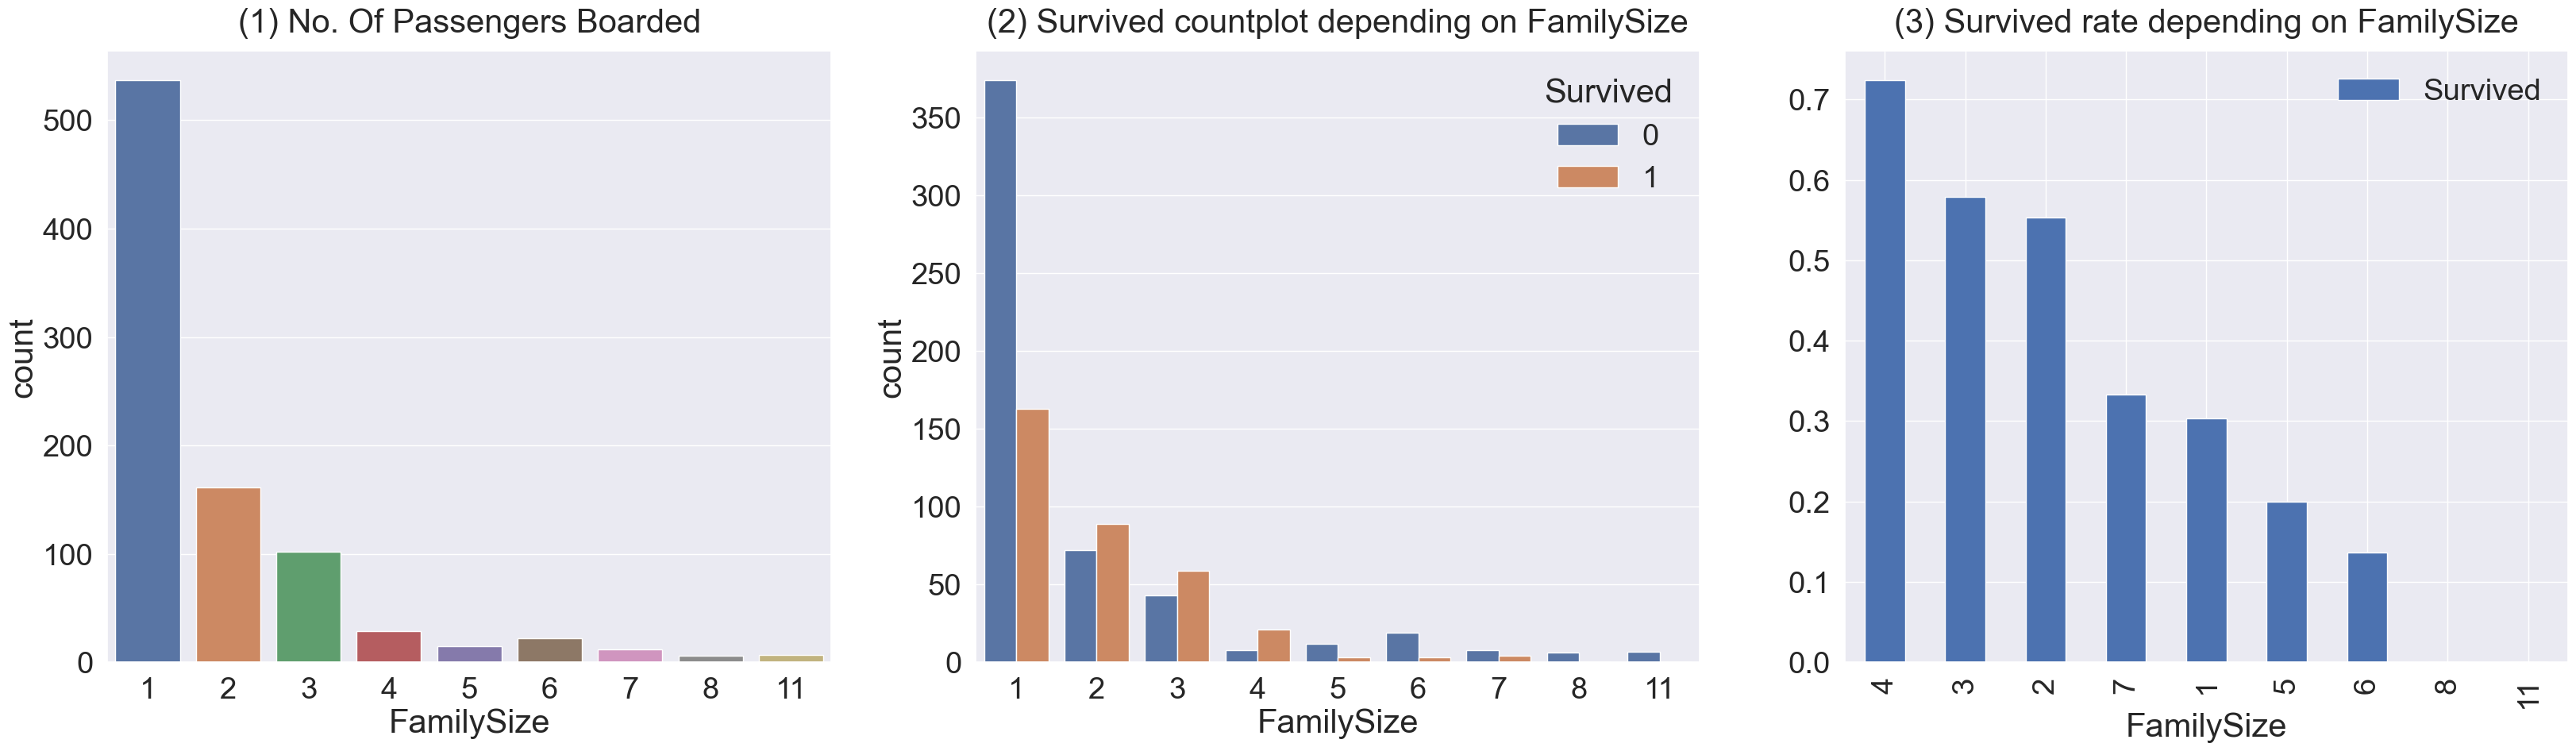

In [99]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- 가족이 너무 많아도, 가족이 너무 적어도 생존률이 높지 않음. 적절한 가족 (3~4명)정도가 생존확률이 제일 큼

## 2.8 Fare
- 탑승 요금 (지속변수)

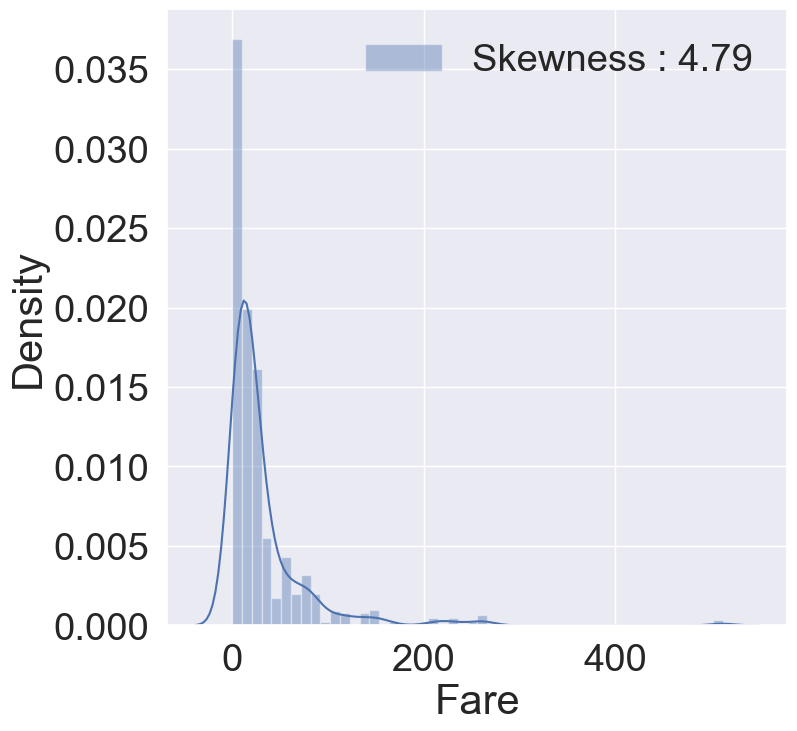

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- skew()
    - Skewness를 측정한 값 기준으로 -2~+2는 치우침이 없는 데이터
    - Skewed 데이터를 변환하는 이유는 꼬리에 있는 값을 모델에 제대로 학습시키기 위함이다.
    - -2 미만은 Negative Skew, +2 초과는 Positive Skew
    - Positive Skewness는 오른쪽에 꼬리를 가진(왼쪽에 데이터가 많은)형태이고, Negative Skewness는 왼쪽에 꼬리를 가진(오른쪽에 데이터가 많은) 형태
    - -> 좌측값으로 치우치면 양수, 우측값으로 치우치면 음수
    
    
- 보시다시피, distribution이 매우 비대칭인 것을 알 수 있습니다.(high skewness). 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수도 있습니다. 몇개 없는 outlier 에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있습니다.
- outlier의 영향을 줄이기 위해 Fare 에 log 를 취하겠습니다.
- 여기서 우리는 pandas 의 유용한 기능을 사용할 겁니다. dataFrame 의 특정 columns 에 공통된 작업(함수)를 적용하고 싶으면 아래의 map, 또는 apply 를 사용하면 매우 손쉽게 적용할 수 있습니다.
- 우리가 지금 원하는 것은 Fare columns 의 데이터 모두를 log 값 취하는 것인데, 파이썬의 간단한 lambda 함수를 이용해 간단한 로그를 적용하는 함수를 map 에 인수로 넣어주면, Fare columns 데이터에 그대로 적용이 됩니다. 매우 유용한 기능이니 꼭 숙지하세요!

In [101]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환합니다.

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0) # 양수일때 log를 씌움
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0) # 위와 마찬가지로 양수일때 log를 씌움

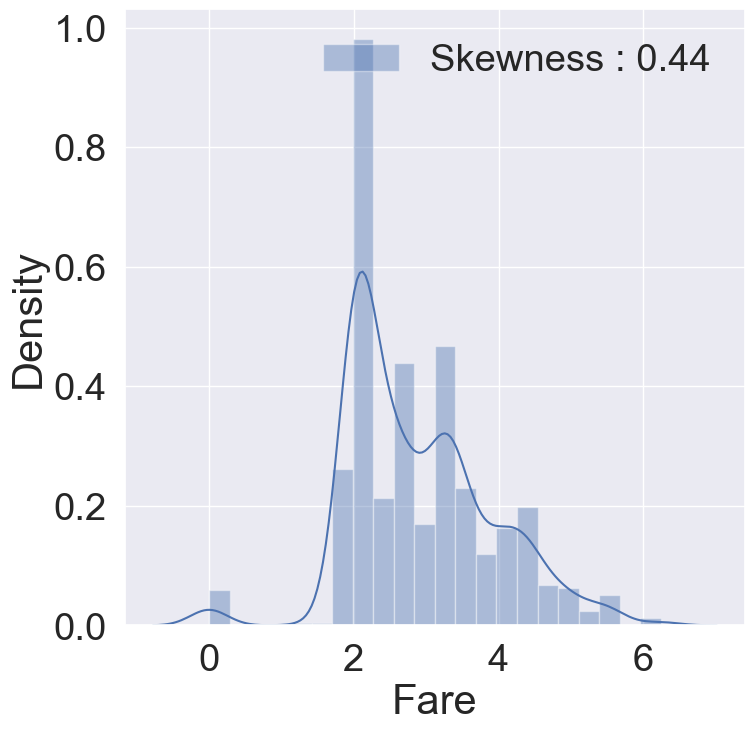

In [102]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- log 를 취하니, 이제 비대칭성이 많이 사라진 것을 볼 수 있습니다.
- 우리는 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있습니다.
- 사실 방금한 것은 feature engineering 에 들어가는 부분인데, 여기서 작업했습니다.

## 2.9 Cabin
- 이 칼럼은 nan이 80퍼센트 가까이 되므로 시각화는 진행하지 않습니다
- 왜그런지는 위의 null rate를 확인하시면 됩니다.

## 2.10 Ticket

In [103]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

- 다른 것들이 너무 많아 사용하지 않는 것이 좋을 것 같습니다.

# 머신러닝 (예측 모델)
## 전처리

In [104]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


- 데이터를 확인해보면 null값이 존재하는 것을 확인할 수 있습니다. 머신러닝에서는 이러한 null값을 모두 없애거나, 대체한 다음 숫자형 변수로 나누어 진행해야 합니다.

- df_test 데이터로 검증을 하기에, 같은 방식으로 진행합니다.

### 1.나이분포 (결측값 -> 중간값으로, 범위형으로 만들기)

In [105]:
# 결측값 채우기
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())

In [106]:
# 범주형으로 만들기
for i in range(len(df_train)):
    if df_train['Age'][i] <=16:
        df_train['Age'][i] = 0
    elif (df_train['Age'][i] > 16) & (df_train['Age'][i] <=32):
        df_train['Age'][i] = 1
    elif (df_train['Age'][i] > 32) & (df_train['Age'][i] <=48):
        df_train['Age'][i] = 2
    elif (df_train['Age'][i] > 48) & (df_train['Age'][i] <=64):
        df_train['Age'][i] = 3
    else:
        df_train['Age'][i] = 4

In [107]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
for i in range(len(df_test)):
    if df_test['Age'][i] <=16:
        df_test['Age'][i] = 0
    elif (df_test['Age'][i] > 16) & (df_test['Age'][i] <=32):
        df_test['Age'][i] = 1
    elif (df_test['Age'][i] > 32) & (df_test['Age'][i] <=48):
        df_test['Age'][i] = 2
    elif (df_test['Age'][i] > 48) & (df_test['Age'][i] <=64):
        df_test['Age'][i] = 3
    else:
        df_test['Age'][i] = 4

### 2.Cabin 
- Cabin의 경우는 결측값이 너무 많아서 활용할 수 없음

In [108]:
# Name, Ticket, Cabin과 함께 제거
df_train.drop(['Name','Ticket','Cabin'],axis=1, inplace=True)

In [109]:
df_test.drop(['Name','Ticket','Cabin'],axis=1, inplace=True)

### 3. Embarked

In [110]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

- S가 가장 많이 나오기에, 결측값은 S로 채워준다.

In [111]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')
# 숫자형, 범주형 변수로 변환
df_train['Embarked'] = df_train['Embarked'].map({'S':0, 'C':1, 'Q':2})

- map : https://blockdmask.tistory.com/531 참조
    - 일관되게 데이터를 변경할 수도 있고, 함수를 추가할 수도 있음

In [112]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
 9   FamilySize   891 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 69.7+ KB


In [113]:
df_test['Embarked'] = df_test['Embarked'].fillna('S')
# 숫자형, 범주형 변수로 변환
df_test['Embarked'] = df_test['Embarked'].map({'S':0, 'C':1, 'Q':2})

### 4. Sex

In [114]:
# 숫자형 변수로 변환
df_train['Sex'] = df_train['Sex'].map({'male':0, 'female':1})

In [115]:
df_test['Sex'] = df_test['Sex'].map({'male':0, 'female':1})

In [116]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
 9   FamilySize   891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


### 5. PassengerId

In [117]:
# 사용에 도움이 되지 않기에 제거
df_train.drop('PassengerId', axis=1, inplace=True)

In [118]:
# 사용에 도움이 되지 않기에 제거
df_test.drop('PassengerId', axis=1, inplace=True)

- 이제 머신러닝을 위한 모든 준비가 끝났습니다. 간단한 결정트리, 랜덤 포레스트로 실습을 해보겠습니다.
- 학습은 df_train, 검증은 df_test로 진행합니다.

## 모델링
- 이진 분류이므로 1이냐 0이냐로 예측합니다. target은 위에서 말했듯이 Survived입니다.

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [120]:
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [122]:
# 결정트리
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, pred_dt)
print(acc_dt)

0.8208955223880597


In [123]:
# 랜덤포레스트
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)
print(acc_rf)

0.835820895522388


In [124]:
# 로지스틱 회귀
lr = RandomForestClassifier()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, pred_lr)
print(acc_lr)

0.8171641791044776


### 가장 정확도가 높은 랜덤포레스트로 예측 수행 (만드는 시점)

In [125]:
print(confusion_matrix(y_test, pred_dt))

[[151  17]
 [ 31  69]]


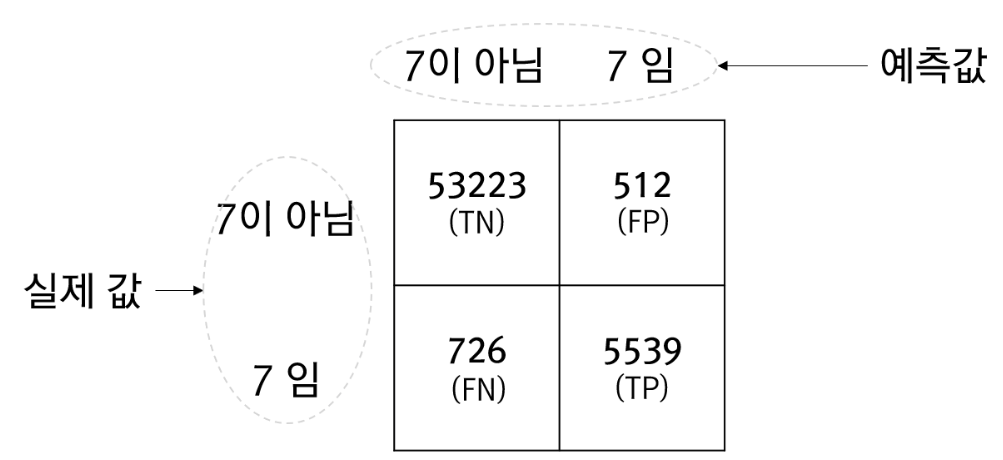

- TP : Positive로 예측했는데 True인 경우
- TN : Negative로 예측했는데 True인 경우
- FP : Positive로 예측했는데 False인 경우 (실제는 Negative)
- FN : Negative로 예측했는데 False인 경우 (실제는 Positive)

In [126]:
df_test.dropna(inplace=True)

In [127]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        418 non-null    float64
 6   Embarked    418 non-null    int64  
 7   FamilySize  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [128]:
df_test['예측결과'] = rf.predict(df_test)

In [129]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,예측결과
0,3,0,2.0,0,0,2.057860,2,1,0
1,3,1,2.0,1,0,1.945910,0,2,0
2,2,0,3.0,0,0,2.270836,2,1,0
3,3,0,1.0,0,0,2.159003,0,1,0
4,3,1,1.0,1,1,2.508582,0,3,0
...,...,...,...,...,...,...,...,...,...
413,3,0,1.0,0,0,2.085672,0,1,0
414,1,1,2.0,0,0,4.690430,1,1,1
415,3,0,2.0,0,0,1.981001,0,1,0
416,3,0,1.0,0,0,2.085672,0,1,0
